This notebook performs comprehensive exploratory data analysis on the Amazon product reviews dataset to understand its structure, quality, and characteristics. The analysis informs the design of our recommendation system.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)

DATA_PATH = Path.cwd().parent / 'data' / 'raw' / 'reviews.csv'
df = pd.read_csv(DATA_PATH)
print(f"Loaded {df.shape[0]:,} rows, {df.shape[1]} cols | {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

Loaded 1,610,012 rows, 16 cols | 6372.9 MB


In [2]:
print(f"Shape: {df.shape} | Records: {df.shape[0]:,} | Features: {df.shape[1]}\n")

for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    unique_count = df[col].nunique()
    print(f"{i:2d}. {col:<20} | {str(dtype):<10} | Missing: {missing_pct:5.1f}% | Unique: {unique_count:,}")

df.head()

Shape: (1610012, 16) | Records: 1,610,012 | Features: 16

 1. main_category        | object     | Missing:   6.6% | Unique: 42
 2. title                | object     | Missing:   0.0% | Unique: 1,551,347
 3. average_rating       | float64    | Missing:   0.0% | Unique: 41
 4. rating_number        | int64      | Missing:   0.0% | Unique: 10,508
 5. features             | object     | Missing:   0.0% | Unique: 953,540
 6. description          | object     | Missing:   0.0% | Unique: 746,131
 7. price                | object     | Missing:  67.3% | Unique: 33,564
 8. images               | object     | Missing:   0.0% | Unique: 1,469,311
 9. videos               | object     | Missing:   0.0% | Unique: 357,007
10. store                | object     | Missing:   0.6% | Unique: 142,180
11. categories           | object     | Missing:   0.0% | Unique: 1,278
12. details              | object     | Missing:   0.0% | Unique: 1,565,224
13. parent_asin          | object     | Missing:   0.0% | Uniq

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,All Electronics,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[],['Teleporter V3 The “Teleporter V3” kit sets a...,NaN,"{'hi_res': array([None], dtype=object), 'large...","{'title': array([], dtype=object), 'url': arra...",Fat Shark,['Electronics' 'Television & Video' 'Video Gla...,"{""Date First Available"": ""August 2, 2014"", ""Ma...",B00MCW7G9M,NaN,NaN,NaN
1,All Electronics,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,['UPC: 662774021904' 'Weight: 0.600 lbs'],['HDMI In - HDMI Out'],NaN,{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...",SIIG,['Electronics' 'Television & Video' 'Accessori...,"{""Product Dimensions"": ""0.83 x 4.17 x 2.05 inc...",B00YT6XQSE,NaN,NaN,NaN
2,Computers,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,['WARNING: Please IDENTIFY MODEL NUMBER on the...,[],19.99,{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array(['AL 2Sides Video', 'MacBook P...",Digi-Tatoo,['Electronics' 'Computers & Accessories' 'Lapt...,"{""Brand"": ""Digi-Tatoo"", ""Color"": ""Fresh Marble...",B07SM135LS,NaN,NaN,NaN
3,AMAZON FASHION,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,['☛NotoCity 22mm band is designed for Vivoacti...,[],9.99,{'hi_res': array(['https://m.media-amazon.com/...,"{'title': array([], dtype=object), 'url': arra...",NotoCity,"['Electronics' 'Wearable Technology' 'Clips, A...","{""Date First Available"": ""May 29, 2020"", ""Manu...",B089CNGZCW,NaN,NaN,NaN
4,Cell Phones & Accessories,Motorola Droid X Essentials Combo Pack,3.8,64,['New Droid X Essentials Combo Pack'\n 'Exclus...,['all Genuine High Quality Motorola Made Acces...,14.99,"{'hi_res': array([None, None, None, None, None...","{'title': array([], dtype=object), 'url': arra...",Verizon,['Electronics' 'Computers & Accessories'\n 'Co...,"{""Product Dimensions"": ""11.6 x 6.9 x 3.1 inche...",B004E2Z88O,NaN,NaN,NaN


## Data Quality Assessment

         Column  Missing_Count  Missing_Percentage Data_Type
bought_together        1610012          100.000000   float64
         author        1609536           99.970435    object
       subtitle        1609161           99.947143    object
          price        1083247           67.281921    object
  main_category         106334            6.604547    object
          store           9600            0.596269    object
          title            100            0.006211    object
 average_rating              0            0.000000   float64
         images              0            0.000000    object
    description              0            0.000000    object
       features              0            0.000000    object
  rating_number              0            0.000000     int64
        details              0            0.000000    object
     categories              0            0.000000    object
         videos              0            0.000000    object
    parent_asin         

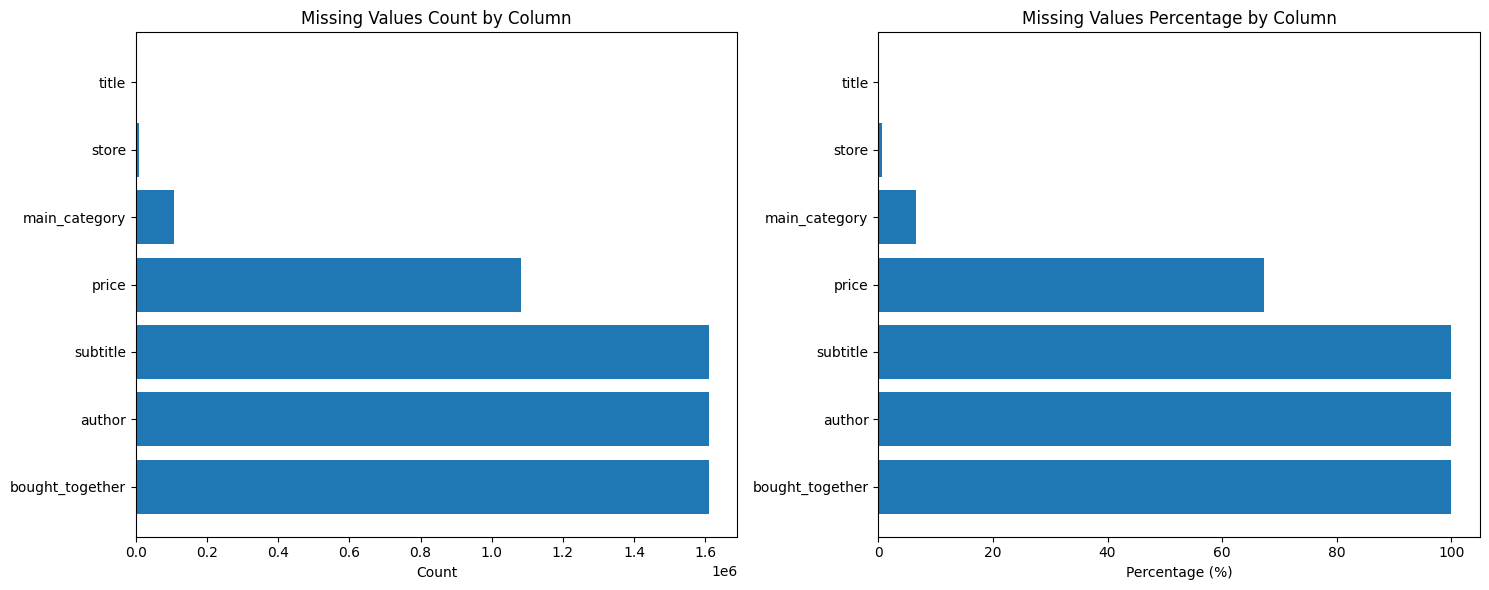


Complete rows: 0 (0.0%) | Missing rows: 1,610,012
Worst column: bought_together (100.0% missing)


In [3]:
missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100,
    'Data_Type': df.dtypes
}).sort_values('Missing_Count', ascending=False)

print(missing_stats.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

missing_cols = missing_stats[missing_stats['Missing_Count'] > 0]
if len(missing_cols) > 0:
    axes[0].barh(missing_cols['Column'], missing_cols['Missing_Count'])
    axes[0].set_title('Missing Values Count by Column')
    axes[0].set_xlabel('Count')
    
    axes[1].barh(missing_cols['Column'], missing_cols['Missing_Percentage'])
    axes[1].set_title('Missing Values Percentage by Column')
    axes[1].set_xlabel('Percentage (%)')
else:
    axes[0].text(0.5, 0.5, 'No missing values found', ha='center', va='center', transform=axes[0].transAxes)
    axes[1].text(0.5, 0.5, 'Complete dataset', ha='center', va='center', transform=axes[1].transAxes)

plt.tight_layout()
plt.show()

complete_rows = df.dropna().shape[0]
print(f"\nComplete rows: {complete_rows:,} ({complete_rows/len(df)*100:.1f}%) | Missing rows: {len(df) - complete_rows:,}")
if missing_stats['Missing_Count'].max() > 0:
    worst = missing_stats.loc[missing_stats['Missing_Count'].idxmax()]
    print(f"Worst column: {worst['Column']} ({worst['Missing_Percentage']:.1f}% missing)")

In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    values = df[col].dropna()
    if len(values) > 0:
        print(f"{col}: [{values.min():.2f}, {values.max():.2f}] | μ={values.mean():.2f} σ={values.std():.2f}", end="")
        
        if col == 'average_rating':
            invalid = ((values < 1) | (values > 5)).sum()
            if invalid > 0:
                print(f" | Invalid: {invalid}", end="")
        
        if col == 'rating_number':
            negative = (values < 0).sum()
            high_engagement = (values > 100).sum()
            if negative > 0:
                print(f" | Negative: {negative}", end="")
            print(f" | >100 ratings: {high_engagement:,}", end="")
        
        if 'price' in col.lower():
            negative = (values < 0).sum()
            zero = (values == 0).sum()
            if negative > 0:
                print(f" | Negative: {negative}", end="")
            if zero > 0:
                print(f" | Zero: {zero}", end="")
        print()

text_cols = df.select_dtypes(include=['object']).columns
print(f"\nText columns ({len(text_cols[:5])}):")
for col in text_cols[:5]:
    non_null = df[col].dropna()
    if len(non_null) > 0:
        avg_len = non_null.astype(str).str.len().mean()
        empty = (non_null.astype(str).str.strip() == '').sum()
        print(f"  {col}: {avg_len:.0f} chars avg | Empty: {empty}")

dup_count = df.duplicated().sum()
print(f"\nDuplicates: {dup_count:,} ({dup_count/len(df)*100:.2f}%)" if dup_count > 0 else "\nDuplicates: 0")

average_rating: [1.00, 5.00] | μ=4.01 σ=0.83
rating_number: [1.00, 1034896.00] | μ=180.48 σ=2543.98 | >100 ratings: 259,987

Text columns (5):
  main_category: 15 chars avg | Empty: 0
  title: 123 chars avg | Empty: 0
  features: 477 chars avg | Empty: 0
  description: 466 chars avg | Empty: 0
  price: 5 chars avg | Empty: 0

Duplicates: 0


## Product Categories and Store Analysis

Categories: 42
Top 15:
 1. Computers                      418,868 (26.02%)
 2. All Electronics                376,435 (23.38%)
 3. Camera & Photo                 223,690 (13.89%)
 4. Cell Phones & Accessories      138,237 ( 8.59%)
 5. Home Audio & Theater           106,516 ( 6.62%)
 6. Industrial & Scientific        50,555 ( 3.14%)
 7. Car Electronics                27,332 ( 1.70%)
 8. Tools & Home Improvement       24,042 ( 1.49%)
 9. Amazon Home                    21,299 ( 1.32%)
10. Office Products                21,250 ( 1.32%)
11. AMAZON FASHION                 18,391 ( 1.14%)
12. Sports & Outdoors              14,581 ( 0.91%)
13. Automotive                     13,956 ( 0.87%)
14. GPS & Navigation                9,339 ( 0.58%)
15. Amazon Devices                  8,484 ( 0.53%)

Stores: 142,180
Top 10:
 1. Amazon Renewed            30,576 ( 1.90%)
 2. HP                        17,129 ( 1.06%)
 3. Sony                      14,160 ( 0.88%)
 4. Generic                   13,499 ( 0.84%

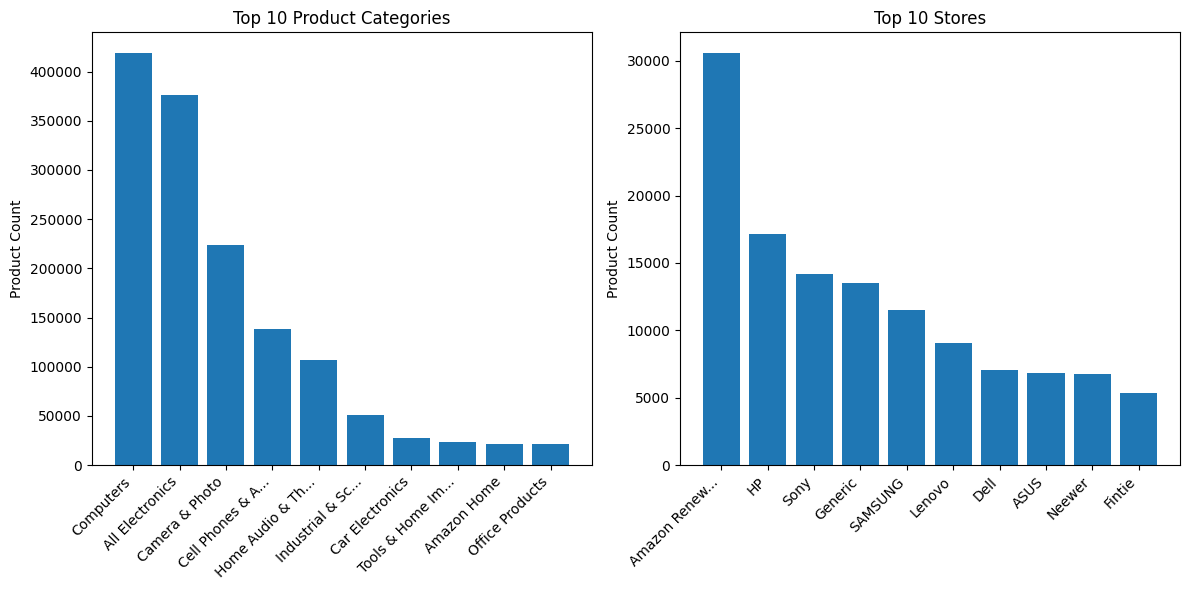

In [5]:
if 'main_category' in df.columns:
    category_counts = df['main_category'].value_counts()
    print(f"Categories: {df['main_category'].nunique()}\nTop 15:")
    for i, (category, count) in enumerate(category_counts.head(15).items(), 1):
        print(f"{i:2d}. {category:<30} {count:6,} ({count/len(df)*100:5.2f}%)")

if 'store' in df.columns:
    store_counts = df['store'].value_counts()
    print(f"\nStores: {df['store'].nunique():,}\nTop 10:")
    for i, (store, count) in enumerate(store_counts.head(10).items(), 1):
        print(f"{i:2d}. {store:<25} {count:6,} ({count/len(df)*100:5.2f}%)")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

if 'main_category' in df.columns:
    top_10_categories = category_counts.head(10)
    axes[0].bar(range(len(top_10_categories)), top_10_categories.values)
    axes[0].set_xticks(range(len(top_10_categories)))
    axes[0].set_xticklabels([cat[:15] + '...' if len(cat) > 15 else cat for cat in top_10_categories.index], rotation=45, ha='right')
    axes[0].set_title('Top 10 Product Categories')
    axes[0].set_ylabel('Product Count')

if 'store' in df.columns:
    top_10_stores = store_counts.head(10)
    axes[1].bar(range(len(top_10_stores)), top_10_stores.values)
    axes[1].set_xticks(range(len(top_10_stores)))
    axes[1].set_xticklabels([store[:12] + '...' if len(store) > 12 else store for store in top_10_stores.index], rotation=45, ha='right')
    axes[1].set_title('Top 10 Stores')
    axes[1].set_ylabel('Product Count')

plt.tight_layout()
plt.show()

average_rating: n=1,610,012 | μ=4.01 | med=4.20 | σ=0.83 | [1.0, 5.0]
rating_number: n=1,610,012 | μ=180.48 | med=12.00 | σ=2543.98 | [1.0, 1034896.0]
price: n=526,449 | μ=$96.46 | med=$22.90 | σ=$319.17 | p95=$399.95


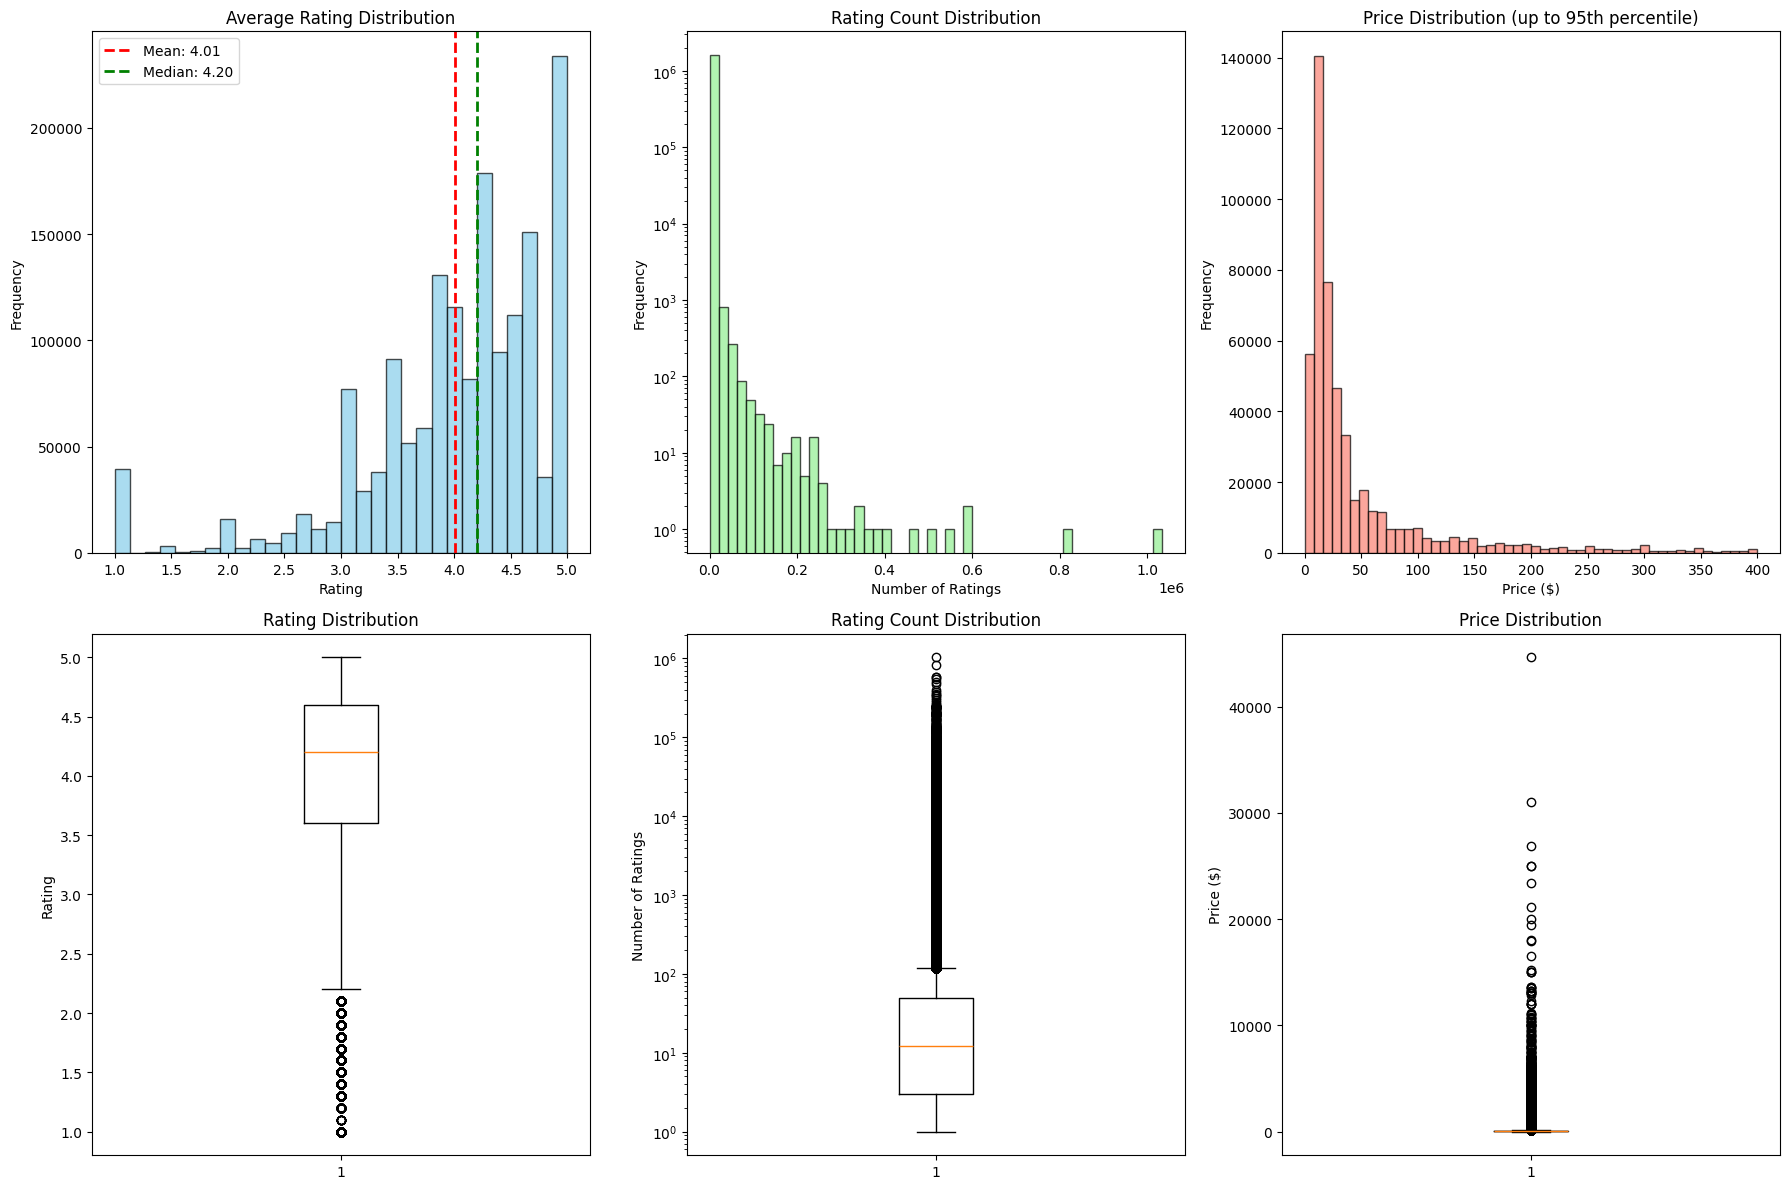

In [6]:
rating_cols = [col for col in df.columns if 'rating' in col.lower()]
price_cols = [col for col in df.columns if 'price' in col.lower()]

for col in rating_cols:
    ratings = pd.to_numeric(df[col], errors='coerce').dropna()
    if len(ratings) > 0:
        print(f"{col}: n={len(ratings):,} | μ={ratings.mean():.2f} | med={ratings.median():.2f} | σ={ratings.std():.2f} | [{ratings.min():.1f}, {ratings.max():.1f}]")

for col in price_cols:
    prices = pd.to_numeric(df[col], errors='coerce').dropna()
    if len(prices) > 0:
        print(f"{col}: n={len(prices):,} | μ=${prices.mean():.2f} | med=${prices.median():.2f} | σ=${prices.std():.2f} | p95=${prices.quantile(0.95):.2f}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

if 'average_rating' in df.columns:
    ratings = pd.to_numeric(df['average_rating'], errors='coerce').dropna()
    axes[0, 0].hist(ratings, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 0].axvline(ratings.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {ratings.mean():.2f}')
    axes[0, 0].axvline(ratings.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {ratings.median():.2f}')
    axes[0, 0].set_title('Average Rating Distribution')
    axes[0, 0].set_xlabel('Rating')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()

if 'rating_number' in df.columns:
    rating_nums = pd.to_numeric(df['rating_number'], errors='coerce').dropna()
    axes[0, 1].hist(rating_nums, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[0, 1].set_title('Rating Count Distribution')
    axes[0, 1].set_xlabel('Number of Ratings')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_yscale('log')

if price_cols:
    col = price_cols[0]
    prices = pd.to_numeric(df[col], errors='coerce').dropna()
    if len(prices) > 0:
        price_95th = prices.quantile(0.95)
        filtered_prices = prices[prices <= price_95th]
        
        axes[0, 2].hist(filtered_prices, bins=50, alpha=0.7, color='salmon', edgecolor='black')
        axes[0, 2].set_title(f'Price Distribution (up to 95th percentile)')
        axes[0, 2].set_xlabel('Price ($)')
        axes[0, 2].set_ylabel('Frequency')

if 'average_rating' in df.columns:
    ratings = pd.to_numeric(df['average_rating'], errors='coerce').dropna()
    axes[1, 0].boxplot(ratings, vert=True)
    axes[1, 0].set_title('Rating Distribution')
    axes[1, 0].set_ylabel('Rating')

if 'rating_number' in df.columns:
    rating_nums = pd.to_numeric(df['rating_number'], errors='coerce').dropna()
    axes[1, 1].boxplot(rating_nums, vert=True)
    axes[1, 1].set_title('Rating Count Distribution')
    axes[1, 1].set_ylabel('Number of Ratings')
    axes[1, 1].set_yscale('log')

if price_cols:
    col = price_cols[0]
    prices = pd.to_numeric(df[col], errors='coerce').dropna()
    if len(prices) > 0:
        axes[1, 2].boxplot(prices, vert=True)
        axes[1, 2].set_title('Price Distribution')
        axes[1, 2].set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

                 average_rating  rating_number  bought_together
average_rating            1.000          0.034              NaN
rating_number             0.034          1.000              NaN
bought_together             NaN            NaN              NaN


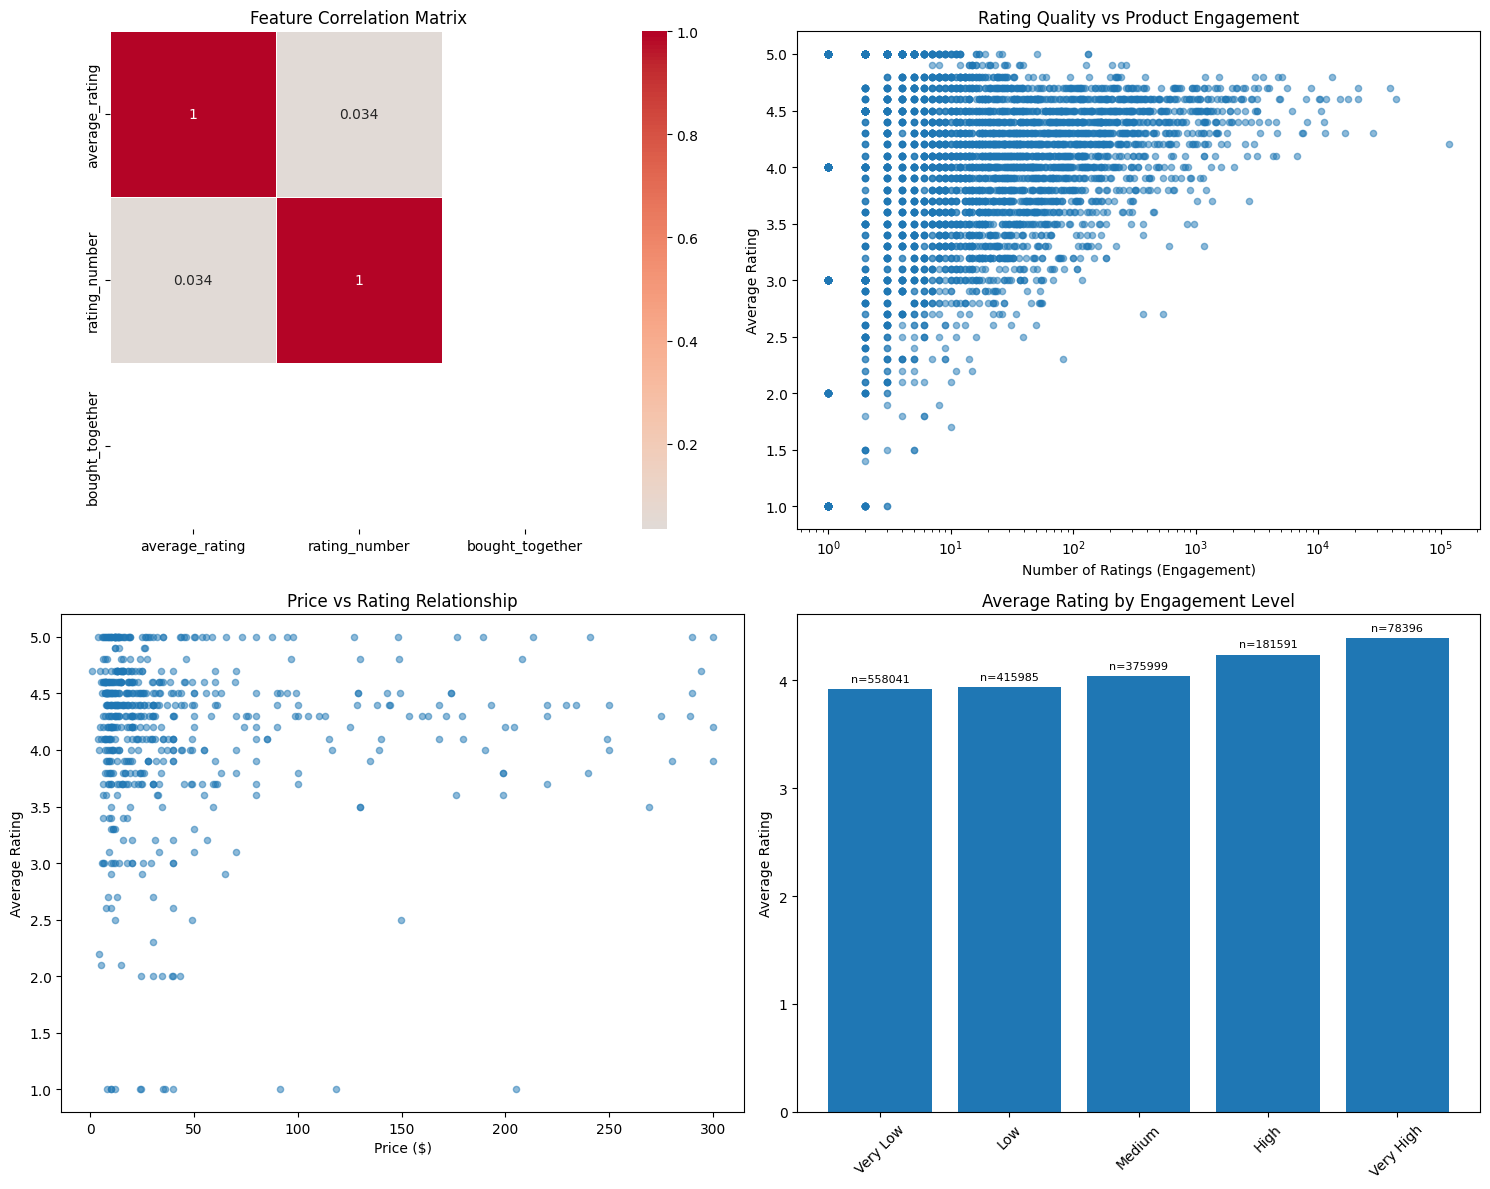


Significant correlations (|r| > 0.3):


In [7]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_columns) >= 2:
    corr_matrix = df[numeric_columns].corr()
    print(corr_matrix.round(3))
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, ax=axes[0,0])
    axes[0,0].set_title('Feature Correlation Matrix')
    
    if 'average_rating' in df.columns and 'rating_number' in df.columns:
        sample_size = min(5000, len(df))
        sample_df = df.sample(sample_size)
        
        x_data = pd.to_numeric(sample_df['rating_number'], errors='coerce')
        y_data = pd.to_numeric(sample_df['average_rating'], errors='coerce')
        
        valid_idx = x_data.notna() & y_data.notna()
        x_clean = x_data[valid_idx]
        y_clean = y_data[valid_idx]
        
        if len(x_clean) > 0:
            axes[0,1].scatter(x_clean, y_clean, alpha=0.5, s=20)
            axes[0,1].set_xlabel('Number of Ratings (Engagement)')
            axes[0,1].set_ylabel('Average Rating')
            axes[0,1].set_title('Rating Quality vs Product Engagement')
            axes[0,1].set_xscale('log')
    
    price_col = next((col for col in df.columns if 'price' in col.lower()), None)
    
    if price_col and 'average_rating' in df.columns:
        sample_df = df.sample(min(2000, len(df)))
        x_data = pd.to_numeric(sample_df[price_col], errors='coerce')
        y_data = pd.to_numeric(sample_df['average_rating'], errors='coerce')
        
        valid_idx = x_data.notna() & y_data.notna()
        x_clean = x_data[valid_idx]
        y_clean = y_data[valid_idx]
        
        if len(x_clean) > 0:
            filtered_idx = x_clean <= x_clean.quantile(0.95)
            axes[1,0].scatter(x_clean[filtered_idx], y_clean[filtered_idx], alpha=0.5, s=20)
            axes[1,0].set_xlabel('Price ($)')
            axes[1,0].set_ylabel('Average Rating')
            axes[1,0].set_title('Price vs Rating Relationship')
    
    if 'average_rating' in df.columns and 'rating_number' in df.columns:
        rating_nums = pd.to_numeric(df['rating_number'], errors='coerce')
        avg_ratings = pd.to_numeric(df['average_rating'], errors='coerce')
        
        valid_data = df[(rating_nums.notna()) & (avg_ratings.notna())].copy()
        
        if len(valid_data) > 0:
            valid_data['engagement_bin'] = pd.cut(
                pd.to_numeric(valid_data['rating_number'], errors='coerce'), 
                bins=[0, 5, 20, 100, 500, float('inf')], 
                labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'],
                include_lowest=True
            )
            
            engagement_ratings = valid_data.groupby('engagement_bin')['average_rating'].agg(['mean', 'count'])
            
            axes[1,1].bar(range(len(engagement_ratings)), engagement_ratings['mean'])
            axes[1,1].set_xticks(range(len(engagement_ratings)))
            axes[1,1].set_xticklabels(engagement_ratings.index, rotation=45)
            axes[1,1].set_title('Average Rating by Engagement Level')
            axes[1,1].set_ylabel('Average Rating')
            
            for i, (mean_val, count_val) in enumerate(zip(engagement_ratings['mean'], engagement_ratings['count'])):
                axes[1,1].text(i, mean_val + 0.05, f'n={count_val}', ha='center', va='bottom', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSignificant correlations (|r| > 0.3):")
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.3:
                print(f"  {corr_matrix.columns[i]} <-> {corr_matrix.columns[j]}: {corr_val:.3f}")

else:
    print("Insufficient numeric columns")

Text columns: ['title', 'description', 'main_category']
title: cov=100.0% | μ_chars=123 μ_words=19 | rich=89.8%
description: cov=100.0% | μ_chars=466 μ_words=72 | rich=54.3%
main_category: cov=93.4% | μ_chars=15 μ_words=2 | rich=0.0%

Content readiness: minimal=1,609,507 (100.0%) | rich=1,469,971 (91.3%)

Sample combined text:
  1. FS-1051 FATSHARK TELEPORTER V3 HEADSET ['Teleporter V3 The “Teleporter V3” kit sets a new level of value in the FPV world with Fat Shark renowned perf...
  2. Ce-H22B12-S1 4Kx2K Hdmi 4Port ['HDMI In - HDMI Out'] All Electronics
  3. Digi-Tatoo Decal Skin Compatible With MacBook Pro 13 inch (Model A2338/ A2289/ A2251) - Protective and Decorative Full Body Laptop Skin Decal Sticker,...


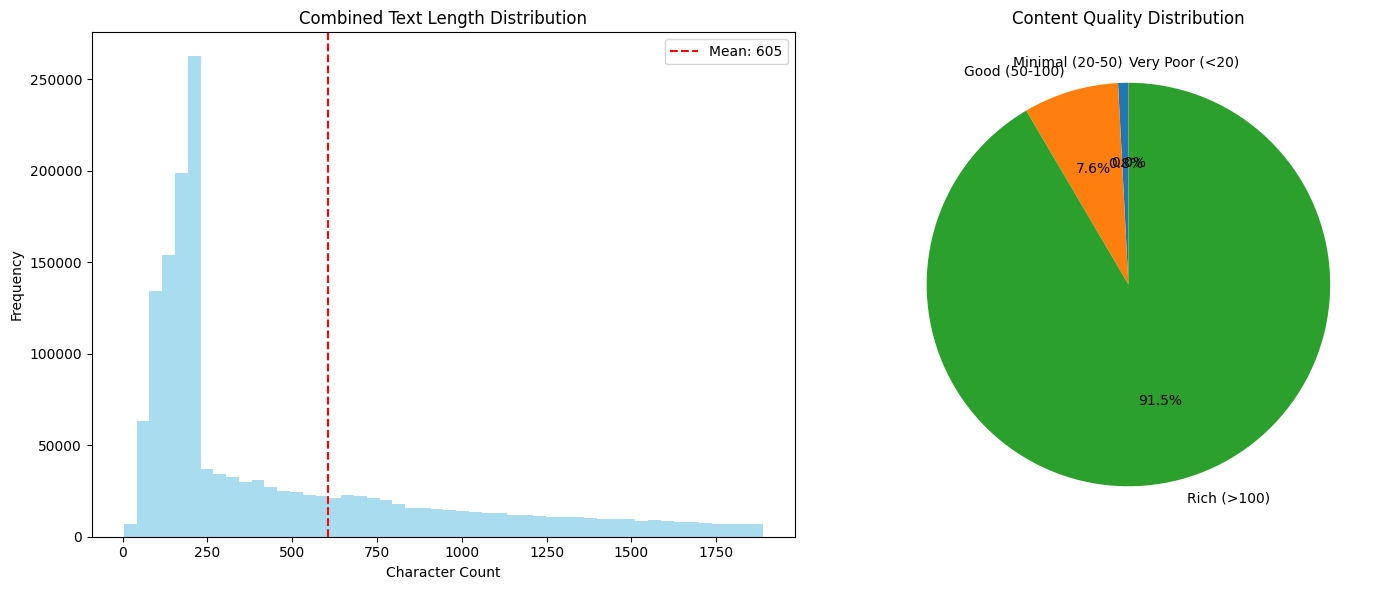

In [8]:
text_columns = ['title', 'description', 'main_category']
available_text_cols = [col for col in text_columns if col in df.columns]
print(f"Text columns: {available_text_cols}")

text_stats = {}
for col in available_text_cols:
    if col in df.columns:
        non_null_series = df[col].dropna().astype(str)
        
        if len(non_null_series) > 0:
            char_lengths = non_null_series.str.len()
            word_counts = non_null_series.str.split().str.len()
            
            text_stats[col] = {
                'coverage': len(non_null_series) / len(df) * 100,
                'avg_char_length': char_lengths.mean(),
                'avg_word_count': word_counts.mean(),
                'rich_content': (char_lengths > 50).sum() / len(non_null_series) * 100
            }
            
            print(f"{col}: cov={text_stats[col]['coverage']:.1f}% | μ_chars={text_stats[col]['avg_char_length']:.0f} μ_words={text_stats[col]['avg_word_count']:.0f} | rich={text_stats[col]['rich_content']:.1f}%")

if available_text_cols:
    combined_features = df[available_text_cols[0]].fillna('').astype(str)
    for col in available_text_cols[1:]:
        combined_features = combined_features + ' ' + df[col].fillna('').astype(str)
    
    text_lengths = combined_features.str.len()
    
    minimal_text = (text_lengths > 20).sum()
    rich_text = (text_lengths > 100).sum()
    
    print(f"\nContent readiness: minimal={minimal_text:,} ({minimal_text/len(df)*100:.1f}%) | rich={rich_text:,} ({rich_text/len(df)*100:.1f}%)")
    
    print(f"\nSample combined text:")
    for i, text in enumerate(combined_features.head(3), 1):
        preview = text[:150] + "..." if len(text) > 150 else text
        print(f"  {i}. {preview}")

if available_text_cols:
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    text_lengths = combined_features.str.len()
    q95 = text_lengths.quantile(0.95)
    filtered_lengths = text_lengths[text_lengths <= q95]
    
    axes[0].hist(filtered_lengths, bins=50, alpha=0.7, color='skyblue')
    axes[0].axvline(text_lengths.mean(), color='red', linestyle='--', 
                    label=f'Mean: {text_lengths.mean():.0f}')
    axes[0].set_title('Combined Text Length Distribution')
    axes[0].set_xlabel('Character Count')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    
    quality_labels = ['Minimal (20-50)', 'Good (50-100)', 'Rich (>100)', 'Very Poor (<20)']
    quality_counts = [
        ((text_lengths >= 20) & (text_lengths < 50)).sum(),
        ((text_lengths >= 50) & (text_lengths < 100)).sum(),
        (text_lengths >= 100).sum(),
        (text_lengths < 20).sum()
    ]
    
    axes[1].pie(quality_counts, labels=quality_labels, autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Content Quality Distribution')
    
    plt.tight_layout()
    plt.show()

else:
    print("No suitable text columns found")

## Content-Based Recommendation Prototype

Dataset: 1,610,012 products | 42 categories | 142,180 stores
Ratings: μ=4.01 | high-rated (≥4.0)=1,003,077 (62.3%)
Engagement: high (>100 ratings)=259,987
Content: meaningful titles=1,599,383 (99.3%)


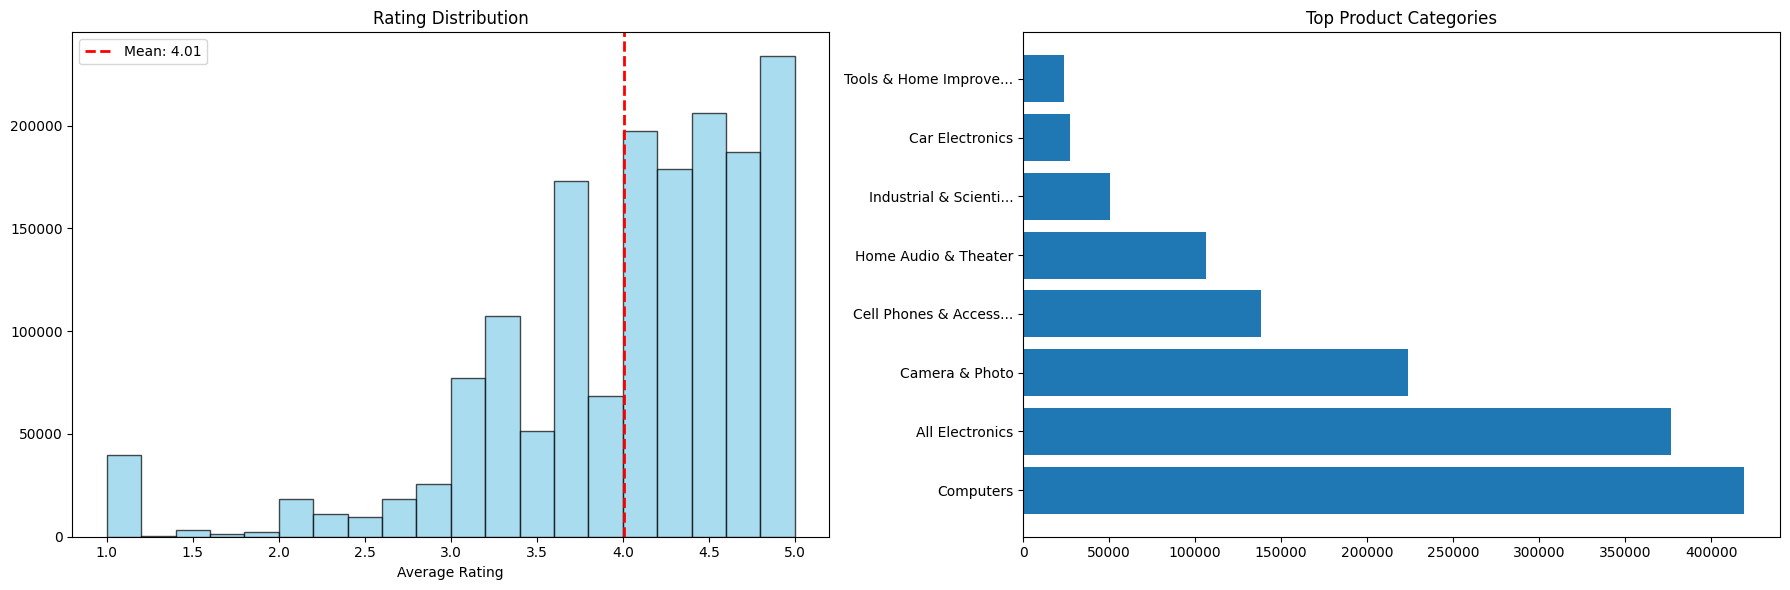

In [9]:
print(f"Dataset: {len(df):,} products", end='')
if 'main_category' in df.columns:
    print(f" | {df['main_category'].nunique()} categories", end='')
if 'store' in df.columns:
    print(f" | {df['store'].nunique():,} stores", end='')
print()

if 'average_rating' in df.columns:
    ratings = pd.to_numeric(df['average_rating'], errors='coerce').dropna()
    print(f"Ratings: μ={ratings.mean():.2f} | high-rated (≥4.0)={((ratings >= 4.0).sum()):,} ({(ratings >= 4.0).sum()/len(ratings)*100:.1f}%)")

if 'rating_number' in df.columns:
    engagement = pd.to_numeric(df['rating_number'], errors='coerce').dropna()
    print(f"Engagement: high (>100 ratings)={((engagement > 100).sum()):,}")

if 'title' in df.columns:
    text_lengths = df['title'].fillna('').astype(str).str.len()
    print(f"Content: meaningful titles={((text_lengths > 20).sum()):,} ({(text_lengths > 20).sum()/len(df)*100:.1f}%)")

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

if 'average_rating' in df.columns:
    ratings = pd.to_numeric(df['average_rating'], errors='coerce').dropna()
    axes[0].hist(ratings, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0].axvline(ratings.mean(), color='red', linestyle='--', linewidth=2, 
                      label=f'Mean: {ratings.mean():.2f}')
    axes[0].set_title('Rating Distribution')
    axes[0].set_xlabel('Average Rating')
    axes[0].legend()

if 'main_category' in df.columns:
    top_categories = df['main_category'].value_counts().head(8)
    axes[1].barh(range(len(top_categories)), top_categories.values)
    axes[1].set_yticks(range(len(top_categories)))
    axes[1].set_yticklabels([cat[:20] + '...' if len(cat) > 20 else cat for cat in top_categories.index])
    axes[1].set_title('Top Product Categories')

plt.tight_layout()
plt.show()